
# Stock Price Forecasting with Facebook Prophet
This notebook demonstrates how to use the Facebook Prophet library to forecast stock prices by analyzing historical trends and projecting future movements with uncertainty intervals.

## Import Libraries

In [92]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
from prophet import Prophet

## Data
We select, download and prepare the data for forecasting

### Select Data to Forecast

In [93]:
# Define the stock symbol and the date range for our data
stock_symbol = 'NVDA'
start_date = '2024-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')  # Sets end date to today's date
print(f"{stock_symbol}\nStart Date: {start_date}\nEnd Date: {end_date}")

NVDA
Start Date: 2024-01-01
End Date: 2024-12-05


### Download

In [94]:
df = yf.download(stock_symbol, start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2024-01-02,48.157665,48.167999,49.294998,47.595001,49.243999,411254000
2024-01-03,47.558792,47.569000,48.183998,47.320000,47.485001,320896000
2024-01-04,47.987705,47.998001,48.500000,47.507999,47.766998,306535000
2024-01-05,49.086464,49.097000,49.547001,48.306000,48.462002,415039000
2024-01-08,52.241787,52.252998,52.275002,49.479000,49.512001,642510000


### Pre-process Data

In [95]:
# Select the desired columns (first level of MultiIndex)
df.columns = df.columns.get_level_values(0)

# Keep only the columns you are interested in
df = df[['Close']]

# If the index already contains the dates, rename the index
df.index.name = 'Date'  # Ensure the index is named "Date"

df.head()

Price,Close
Date,
2024-01-02,48.167999
2024-01-03,47.569000
2024-01-04,47.998001
2024-01-05,49.097000
2024-01-08,52.252998


### Plot the closing price

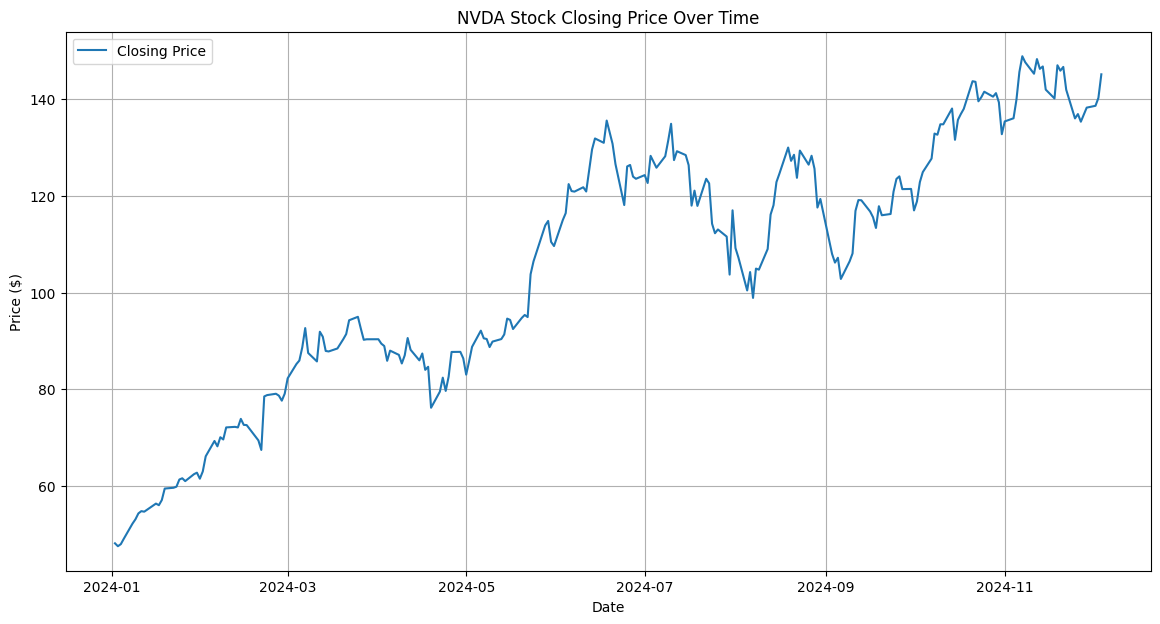

In [96]:
# Plot the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price')
plt.title(f'{stock_symbol} Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)

# Save the figure in 300dpi
plt.savefig(f'{stock_symbol}_stock_price.png', dpi=300)
plt.show()

## Forecast with Facebook Prophet
This cell prepares historical stock price data for the Facebook Prophet model, fits the model, and generates future forecasts. The steps include resetting the index, renaming columns to match Prophet's format, removing timezone information, training the model, extending the timeline for future dates, and making predictions based on the trained model.

In [97]:
# Step 1: Reset the index and prepare data for Prophet
df = df.reset_index()
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})  # Rename columns for Prophet

# Step 2: Remove timezone information from 'ds' column
df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)  # Remove timezone

# Step 3: Fit the Prophet model
# Add customizations
model = Prophet()

model.fit(df)

# Step 4: Create future dates for forecasting
future = model.make_future_dataframe(periods=100)  # Forecast 1 year into the future

# Step 5: Make predictions
forecast = model.predict(future)


12:46:21 - cmdstanpy - INFO - Chain [1] start processing
12:46:21 - cmdstanpy - INFO - Chain [1] done processing


## Plot the Forecast

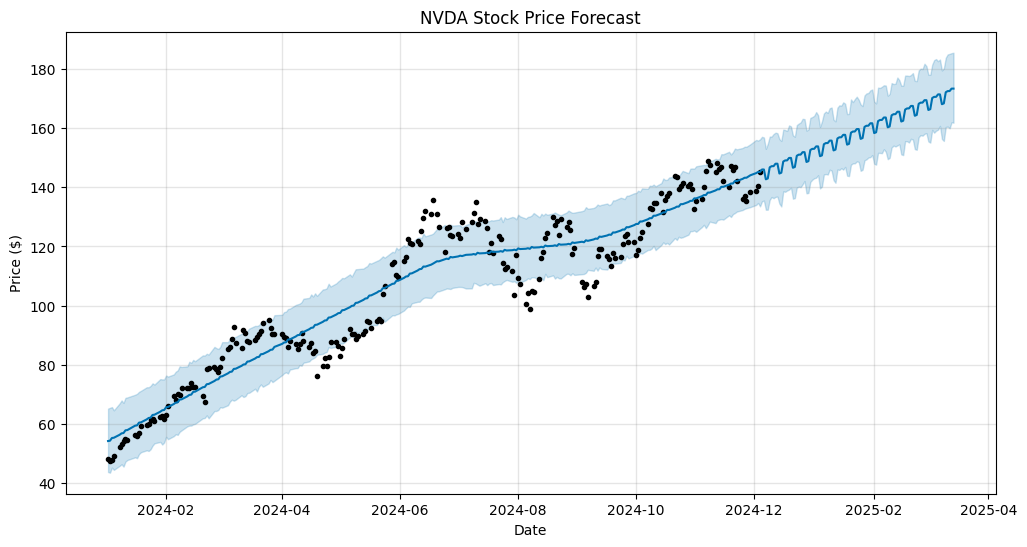

<Figure size 1200x600 with 0 Axes>

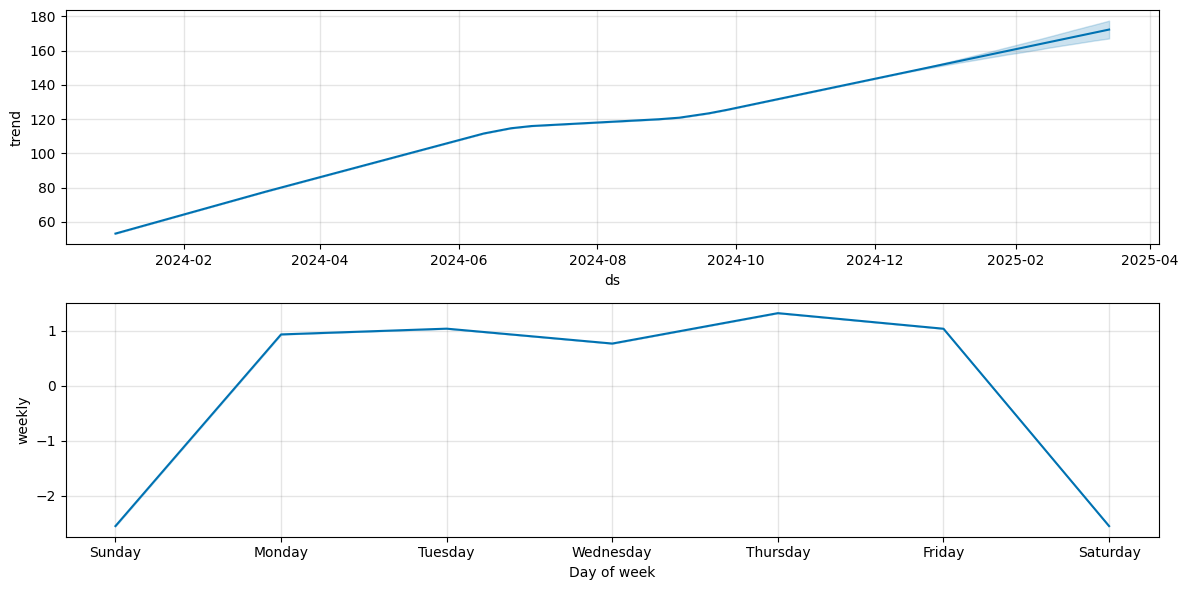

In [98]:
# Step 6: Visualize the forecast with custom figure size
fig = plt.figure(figsize=(12, 6))  # Set figure size to 12x6
model.plot(forecast, ax=fig.gca())  # Use the same axes for Prophet plot
plt.title(f"{stock_symbol} Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.savefig(f"{stock_symbol}_forecast.png", dpi=300)
plt.show()

# Step 7: Optional - Plot forecast components with custom size
fig_components = plt.figure(figsize=(12, 6))
model.plot_components(forecast, figsize=(12, 6))  # Use the 'figsize' parameter for components plot
plt.savefig(f"{stock_symbol}_forecast_components.png", dpi=300)
plt.show()
